<center>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="360"/>
</center>

<center><font size=10>Data Science and Machine Learning</font></center>
<center><font size=6>Google Play Store Case Study</font></center>

<center><img src="https://cdn.pixabay.com/photo/2022/01/29/13/39/smartphone-6977552_960_720.jpg" width="720"></center>

## **Problem Statement**

### **Context**

Advertising is a type of marketing communication used to promote or sell products or services. Advertising is usually paid by sponsors and viewed through various media such as websites, apps, emails and other offline communications.
Android is the mobile operating system running on Google OS with about 69% of the market share worldwide. The Google Play Store is the Android app store used to install Android Apps.

### **Objective**

Zoom Ads is an advertising agency that wants to perform an analysis on the data of the google play store. They need to understand the trend of applications available on the google play store so that they can decide to focus on promoting advertisements on particular applications which are trending in the market and can lead to maximum profit.
As a Data Scientist, you are required to analyze detailed information on apps in the Google Play Store in order to provide insights on app features and the current state of the Android app market.

The dataset provided contains information of over 4000+ apps across different categories along with other useful attributes like Ratings, Reviews etc.

### **Data Description**

* App: Application Name
* Category: Category the app belongs to (`Others` category contain apps from various different categories excluded from the dataset)
* Rating: Overall user rating of the app
* Reviews: Number of user reviews for the app
* Size: Size of the app in kilobytes
* Installs: Number of user downloads/installs for the app
* Paid/Free: Whether an app is paid or free
* Price: price of an app in dollars
* Content Rating: Age group the app is targeted at
* Ad Supported: whether an app supports an Ad or not (Yes/No)
* In App Purchases: App containing in app purchase feature or not (Yes/No)
* Editors Choice: Whether rated as Editor Choice (Yes/No)

## **Importing Necessary Libraries**

Let's start by importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Command to tell Python to actually display the graphs in the notebook
%matplotlib inline

## **Loading the Data**

In [ ]:
play_store_app_data = pd.read_csv('Play_Store.csv')
df = play_store_app_data.copy()

## **Data Overview**

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

#### **Displaying the first few rows of the dataset**

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Paid/Free,Price,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,War Dragons,Others,3.9,160604.0,270.0,10000000.0,Free,0.0,Everyone,Yes,Yes,Yes
1,CV-Library Job Search,BUSINESS,4.4,NaN,46.0,100000.0,Free,0.0,Everyone,No,No,No
2,Surah Al-Waqiah,BOOKS_AND_REFERENCE,NaN,1201.0,29.0,100000.0,Free,0.0,Everyone,Yes,No,No
3,Ay,Others,NaN,11.0,36.0,5000.0,Free,0.0,Teen,Yes,No,No
4,EA Plus,Others,2.5,12.0,12.0,1000.0,Free,0.0,Everyone,No,No,No


The dataset has been loaded properly
- *Dataset consists of several columns displaying the various attributes related to each App*
- *` Category` columns display the category of the App.*
- *The performance of each App has been defined by the users under `Ratings` and `Reviews` columns*
- *Column `Content Rating` displays the Age Group of the users for which the App has been developed*
- *Dataset has also been categorised on the basis of Ads Present in the App under the `Ad Supported` column and whether some of the features in the App are paid or not under the `In App Purchases` column*
- *` Editors Choice` displays whether the App has been Recommended by the Editor or not*
- *From the head of the dataset, it can be observed that there are some values as NaN, which means the dataset contains some missing values*

#### **Checking the shape of the dataset**

In [ ]:
df.shape

(4153, 12)

- *The Dataset has 4153 number of rows with 12 columns*

####**Checking the data types of the columns for the dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4153 entries, 0 to 4152
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   App               4153 non-null   object 
 1   Category          4153 non-null   object 
 2   Rating            3976 non-null   float64
 3   Reviews           4029 non-null   float64
 4   Size              4153 non-null   float64
 5   Installs          4153 non-null   float64
 6   Paid/Free         4153 non-null   object 
 7   Price             4153 non-null   float64
 8   Content Rating    4153 non-null   object 
 9   Ad Supported      4153 non-null   object 
 10  In App Purchases  4153 non-null   object 
 11  Editors Choice    4153 non-null   object 
dtypes: float64(5), object(7)
memory usage: 389.5+ KB


- *We can observe that there around 7 object datatype columns and 5 numerical datatype*
- *All the columns does not have 4153 observations, which can be inferred that there are null values present in the dataset*

#### **Getting the statistical summary for the dataset**

In [ ]:
df.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
App,4153,4153,War Dragons,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,4153,15,Others,1288,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,3976.0,NaN,NaN,NaN,4.189487,0.519792,1.0,4.0,4.3,4.5,5.0
Reviews,4029.0,NaN,NaN,NaN,66964.206751,107418.85154,1.0,224.0,7461.0,78219.0,312204.0
Size,4153.0,NaN,NaN,NaN,82.254408,92.256334,0.011,22.0,42.0,84.0,270.0
Installs,4153.0,NaN,NaN,NaN,3232705.641946,5421343.284861,1.0,10000.0,500000.0,5000000.0,19970000.0
Paid/Free,4153,2,Free,3828,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,4153.0,NaN,NaN,NaN,0.565341,8.926313,0.0,0.0,0.0,0.0,399.99
Content Rating,4153,4,Everyone,3251,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ad Supported,4153,2,Yes,2208,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- *The above table displays the descriptive analysis for Numerical columns*
- *It can be observed that the average rating of Apps is around 4.19, which means most of the Apps have received ratings above average. As it can be seen that 75% of users have given ratings equal to or greater than 4 to the Apps*
- *50% of the apps have received reviews less than 10000, which means users are not preferring to give reviews for most of the apps. The average value is high because of the range of number of reviews as the maximum number of reviews given to an app is very high*
- *Around 90% of the apps are free of cost in the Play store*  
- *There are around 16 categories of Apps present in the Dataset among which 31% of apps are categorised in the Others category*
- *The distribution of apps containing Ads is almost equal in 50:50 ratio, which means in an overall view, there is no trend whether apps are ad-supported or not*
- *Similarly there is an almost equal distribution of apps which contain in App Purchases or not*
- *Around 80% of the apps are not recommended by the Editors*

#### **Checking for missing values in the dataset**

In [ ]:
# checking missing values
df.isnull().sum()

,0
App,0
Category,0
Rating,177
Reviews,124
Size,0
Installs,0
Paid/Free,0
Price,0
Content Rating,0
Ad Supported,0


- *The variable `Rating` and `Reviews ` have 223 and 127 missing values in them*
- *There are no missing values in other variables.*

## **Exploratory Data Analysis**

### **Univariate Analysis**

#### **Observations on Size**

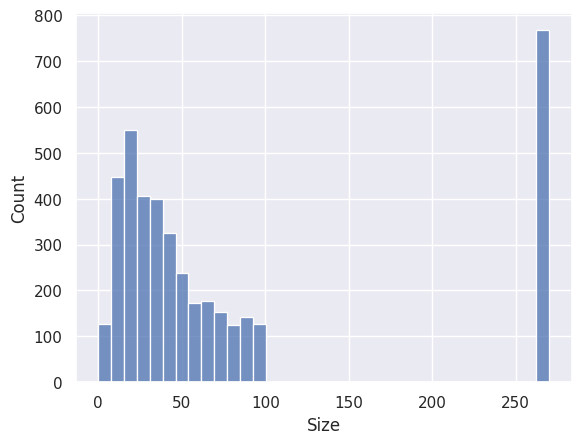

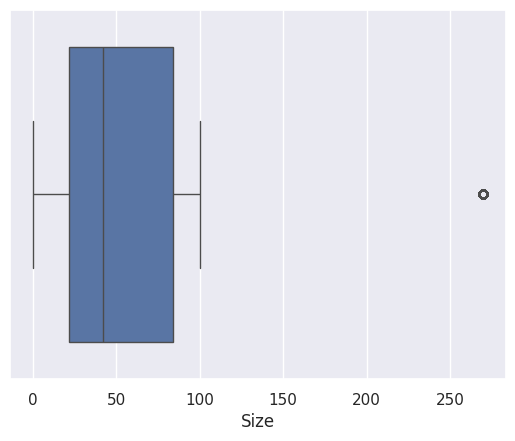

In [ ]:
sns.histplot(data=df,x='Size')
plt.show()
sns.boxplot(data=df,x='Size')
plt.show()

- *The distribution of Size is distributed between 0 - 100 mb, which means most of the apps size are in this range*
- *There are some outliers present at the extreme end, which means some of the apps have higher mb size*


#### **Observations on Rating**

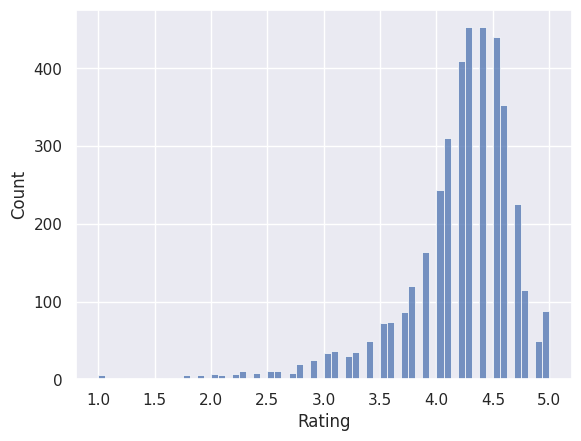

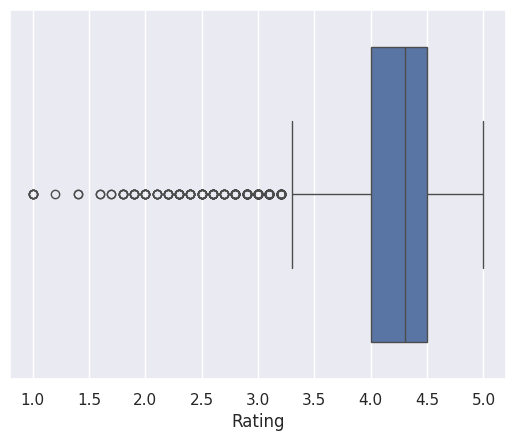

In [ ]:
sns.histplot(data=df,x='Rating')
plt.show()
sns.boxplot(data=df,x='Rating')
plt.show()

- *The distribution of Rating is highly left skewed*
- *There are a lot of outliers in this variable*
- *Most of the ratings are on the higher side*

In [ ]:
df['Rating'] = df['Rating'].fillna(value= df['Rating'].mean())

#### **Observations on Reviews**

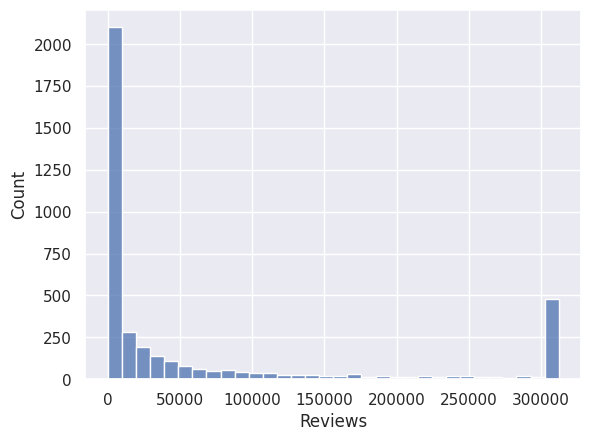

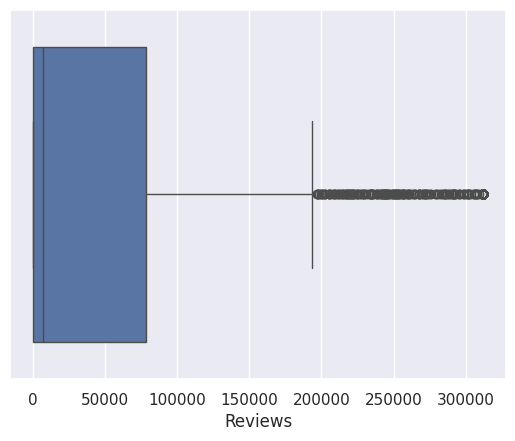

In [ ]:
sns.histplot(data=df,x='Reviews')
plt.show()
sns.boxplot(data=df,x='Reviews')
plt.show()

- *The distribution of Reviews is extremely right skewed*
- *There are a lot of outliers in this variable*
- *Most of the apps has got very less number of reviews*

In [ ]:
df['Reviews'] = df['Reviews'].fillna(value= 0)

"We imputed missing values in the reviews column with 0 because many apps genuinely do not have any reviews, indicating their newness or lack of user engagement.

**Let us first explore the numerical variables.**

In [ ]:
df_copy1=df.copy()

#### **Observations on Installs**

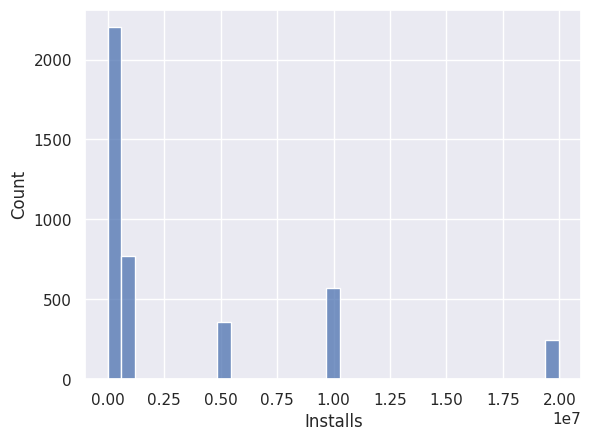

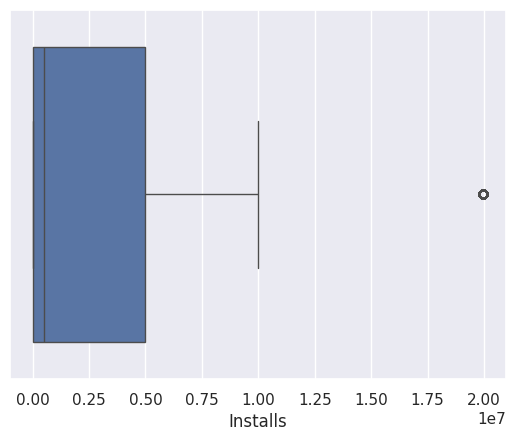

In [ ]:
sns.histplot(data=df,x='Installs')
plt.show()
sns.boxplot(data=df,x='Installs')
plt.show()

- *The distribution of installs is randomly distributed as multiple modes can be seen in the plot*
- *From the box plot, it can be observed that most of the apps are installed 25% of the apps which are installed maximum number of times*

#### **Observations on Price**

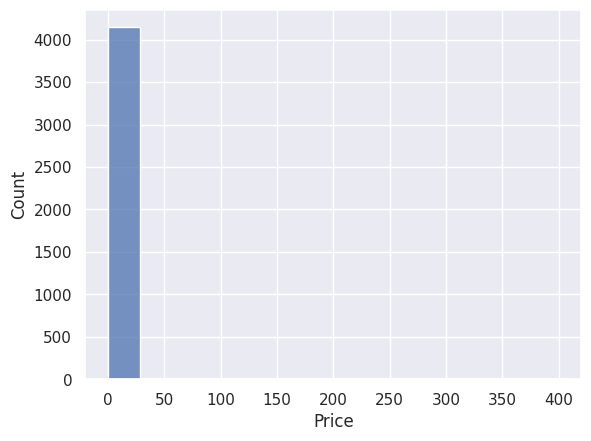

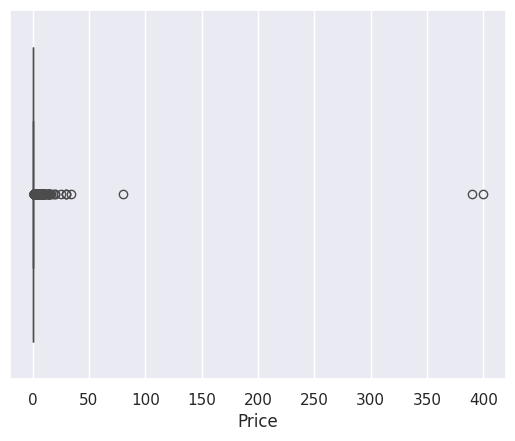

In [ ]:
sns.histplot(data=df,x='Price')
plt.show()
sns.boxplot(data=df,x='Price')
plt.show()

- *As we have already seen in our descriptive analysis, most of the apps have zero price to use*
- *From the box plot, it can be observed that there are some outliers present in the price column*

#### **Observations on Category**

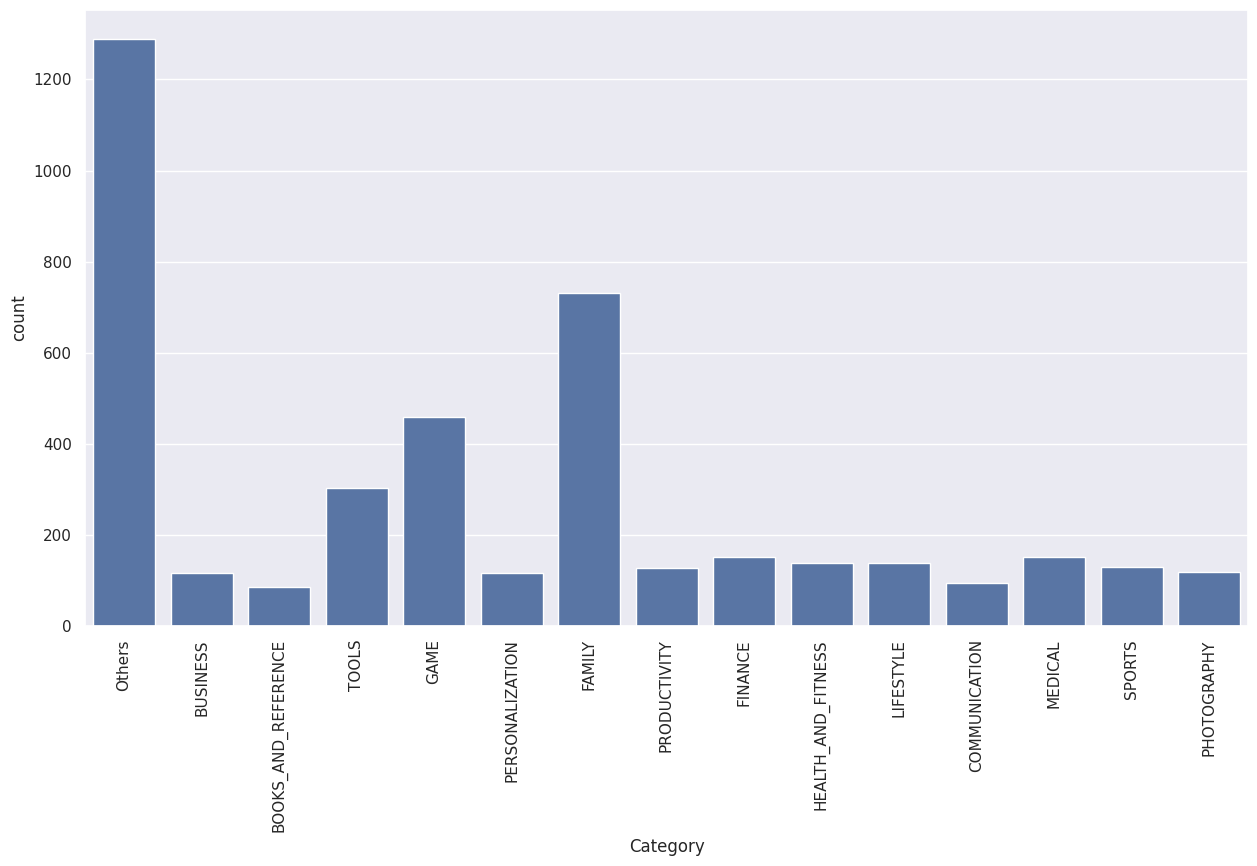

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data=df, x='Category')
plt.xticks(rotation=90);

- *Apps present under Others category are maximum in number*
- *Apart from Others category, most of the apps are in Family Category comprising around 17% of the total apps*
- *Very few apps around 1-2% of apps are in Books and Reference, and Communication Category*

#### **Observations on Paid/Free**

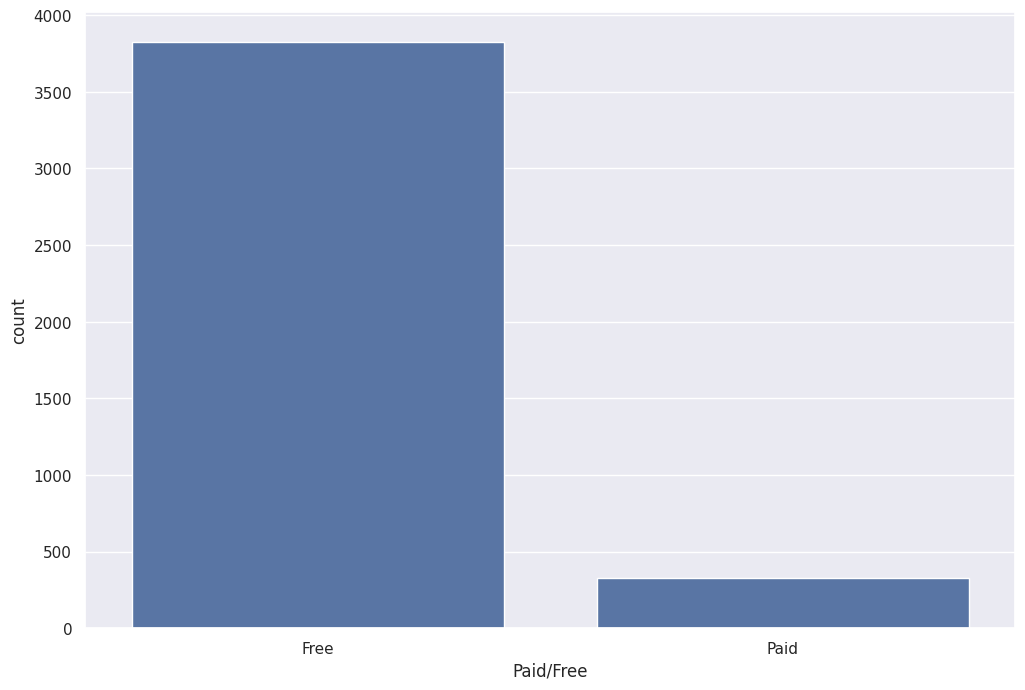

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='Paid/Free');

- *Around 91% of the apps are free to use in play store*

#### **Observations on Content Rating**

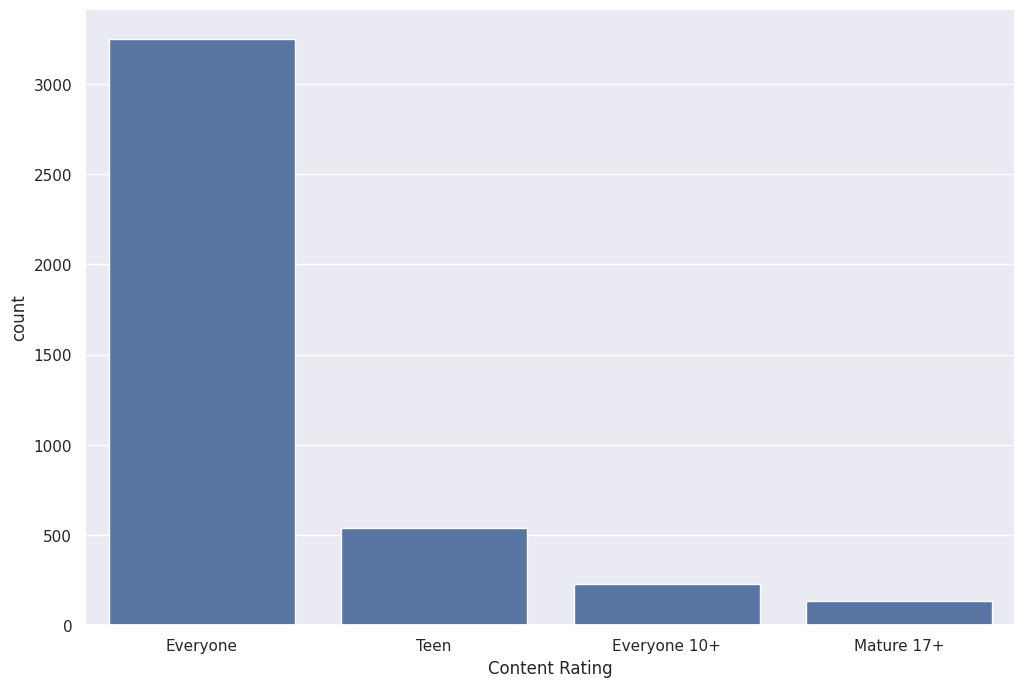

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='Content Rating');

- *Most of the apps have a content rating of 'Everyone', which means around 75% of apps can be used by all age groups of users*

#### **Observations on Editors Choice**

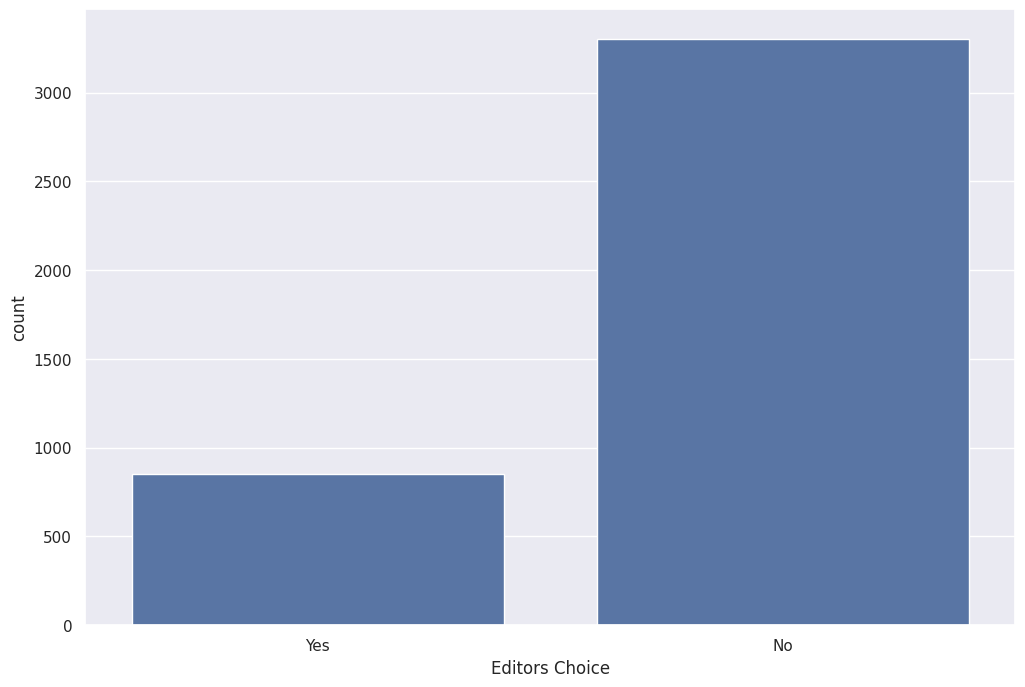

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='Editors Choice');

- *Around 80% of the apps are not recommended by the Editors*

#### **Observations on Ad Supported**

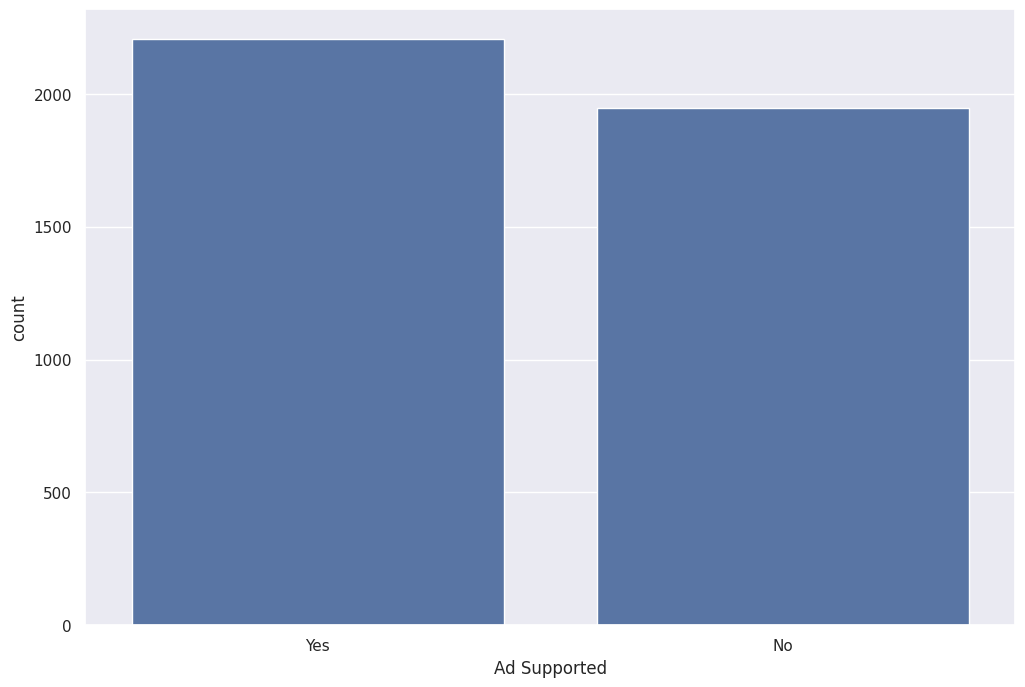

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='Ad Supported');

- *Although there is not much significant difference between the apps which support the Ads and not, it can still be observed that Apps which support Ads are 6% higher than Apps which do not support Ads*

#### **Observations on In App Purchases**

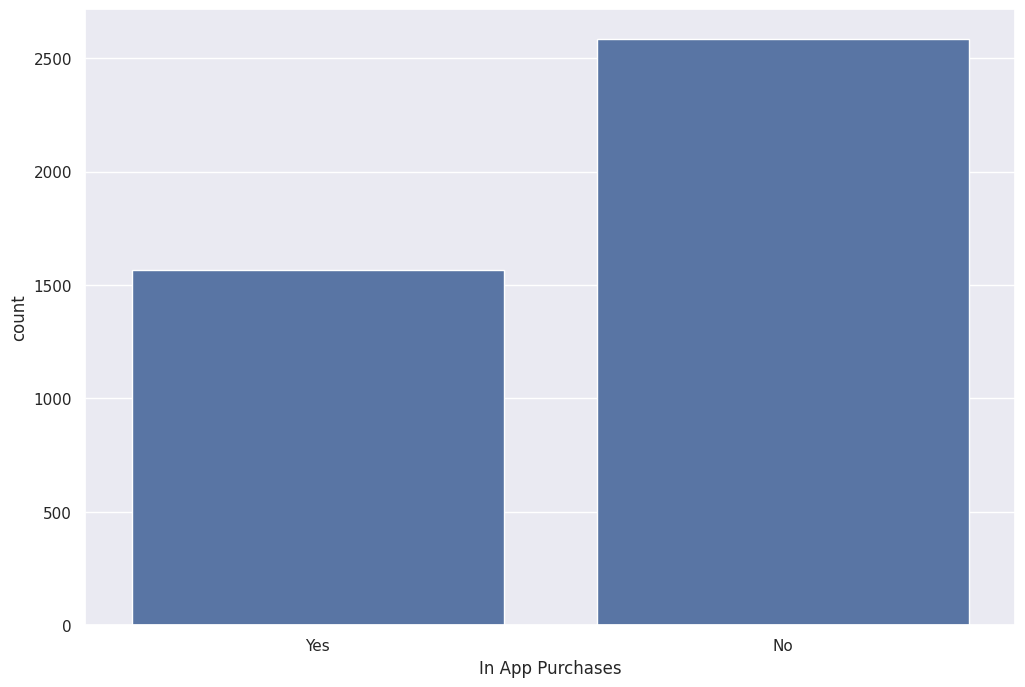

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='In App Purchases');

- *It is interesting to note that most of the apps do no have feature of In app purchases*
- *Only 36% of the apps have In app purchases feature*

### **Bivariate Analysis**

####**Paid/Free vs Rating**

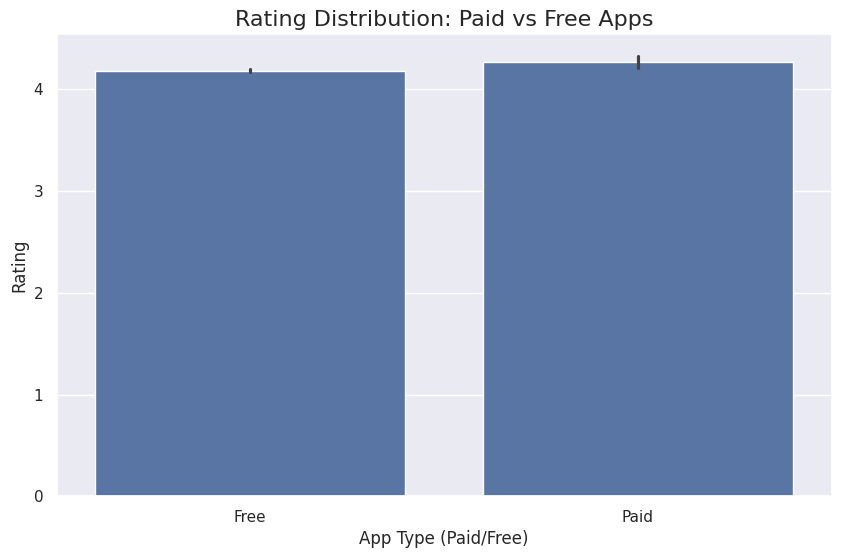

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Paid/Free', y='Rating', data=df)
plt.title('Rating Distribution: Paid vs Free Apps', fontsize=16)
plt.xlabel('App Type (Paid/Free)', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.show()

- *We observe that paid apps generally tend to have higher ratings compared to free apps.*

Let's dive a bit deeper into this with some statistical analysis.

#### **Probability of Paid Apps having higher ratings**

The marketing team is interested in understanding the likelihood of different conversion rates for paid apps based on user ratings. They want to determine the probability that a paid app will receive a high rating (more than 4.5) from users, which can help them target marketing efforts towards high-quality apps and improve conversion rates.

**Note**: The average rating of Play Store apps is ~4.5.

***What's that probability that out of 100 randomly selected paid apps, at most 50 of them will be rated less than 4.5?***

We randomly selected 100 paid apps.

- There are only two possible outcomes (success or failure) for each trial – An app can be rated less than 4.5 or not.

- Number of trials ($n$) is fixed and finite - A sample of size 100 is taken. Each app in the sample represents a trial.

- Each trial is independent of the other trials - It is reasonable to assume that the the selection of one app is independent of others.

- The probability of success ($p$) is the same for each trial - The probability of success (an app will be rated less than 4.5) needs to be calculated

Let's find the probability of success ($p$).

In [ ]:
# Count the number of paid apps
paid_apps = df[df['Paid/Free'] == 'Paid'].shape[0]
print(f"Number of Paid apps: {paid_apps}")

Number of Paid apps: 325


In [ ]:
# Count the number of paid apps with rating less than 4.5
apps_paid_less_rating = df[(df['Paid/Free'] == 'Paid') & (df['Rating'] < 4.5)].shape[0]
print(f"Number of Paid apps with Rating < 4.5: {apps_paid_less_rating}")

Number of Paid apps with Rating < 4.5: 186


In [ ]:
# Calculate  the probability
p = apps_paid_less_rating / paid_apps
print(f"The probability of an app being Paid and having Rating < 4.5 (p) is {round(100*p, 2)}%.")

The probability of an app being Paid and having Rating < 4.5 (p) is 57.23%.


Hence, the number of apps with rating less than 4.5 follows a Binomial distribution with the parameters $n=100$ and $p=0.5723$.

Let's view the distribution.

In [ ]:
from scipy.stats import binom
import matplotlib.pyplot as plt

# size of random sample
n = 100
# value to check for
k = 50

In [ ]:
# import the required function
from scipy.stats import binom
# use the binom.pmf() function to generate the mass probabilities for all possible number of apps rated less than 4.5
binomial_prob = binom.pmf(k = np.arange(n+1),n = n, p = p)
binomial_prob

array([1.29760923e-37, 1.73636919e-35, 1.15012598e-33, 5.02745717e-32,
       1.63139177e-30, 4.19138581e-29, 8.88031023e-28, 1.59571782e-26,
       2.48225961e-25, 3.39539780e-24, 4.13456857e-23, 4.52666304e-22,
       4.49246882e-21, 4.06932649e-20, 3.38385618e-19, 2.59607499e-18,
       1.84550115e-17, 1.22023318e-16, 7.52916058e-16, 4.34815438e-15,
       2.35644942e-14, 1.20123218e-13, 5.77204240e-13, 2.61935537e-12,
       1.12453260e-11, 4.57450154e-11, 1.76575253e-10, 6.47583743e-10,
       2.25922201e-09, 7.50570606e-09, 2.37698691e-08, 7.18226261e-08,
       2.07232820e-07, 5.71415023e-07, 1.50676555e-06, 3.80206659e-06,
       9.18604817e-06, 2.12620489e-05, 4.71693845e-05, 1.00342620e-04,
       2.04763914e-04, 4.00976537e-04, 7.53736985e-04, 1.36043410e-03,
       2.35829338e-03, 3.92709573e-03, 6.28310750e-03, 9.65980893e-03,
       1.42725414e-02, 2.02678051e-02, 2.76633668e-02, 3.62913403e-02,
       4.57608295e-02, 5.54571312e-02, 6.45891608e-02, 7.22857894e-02,
      

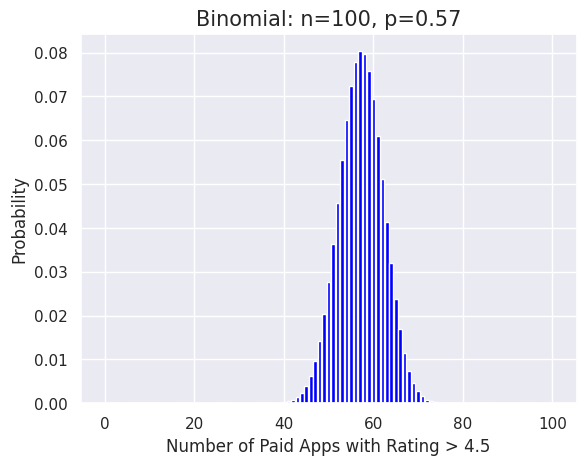

In [ ]:
# Plot the binomial distribution
plt.bar(np.arange(n+1), binomial_prob, color="blue")
plt.title(f'Binomial: n={n}, p={p:.2f}', fontsize=15)
plt.xlabel('Number of Paid Apps with Rating > 4.5')
plt.ylabel('Probability')
plt.show()

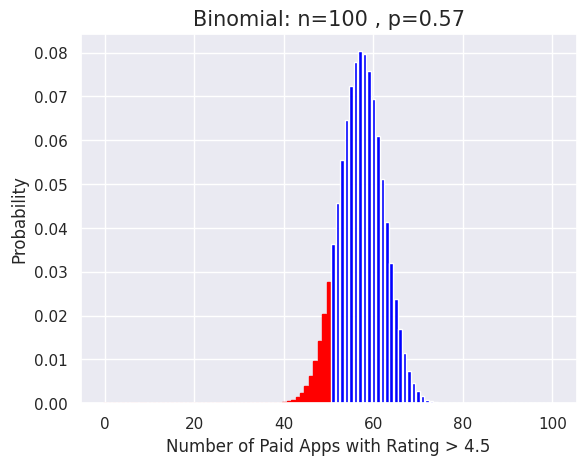

In [ ]:
# plot the probability distribution to better visualize the calculations
barl = plt.bar(np.arange(n+1), binomial_prob, color="blue")
plt.title('Binomial: n=%i , p=%.2f' % (n,p), fontsize=15)
plt.xlabel('Number of Paid Apps with Rating > 4.5')
plt.ylabel('Probability')
for i in range(0,51):
    barl[i].set_color('red')
plt.show()

Let's compute the probability that out of 100 randomly selected paid apps, at most 50 of them will be rated less than 4.5.

We want to compute $P(X \leq 50)$, for which we can use the `cdf` function.

In [ ]:
# Cumulative probability for at most k apps
prob_atleast25 = binom.cdf(k=k, n=n, p=p)
print(f"The probability of at most {k} Paid apps with Rating < 4.5 in a random sample of 100 is {round(100*prob_atleast25, 2)}%.")

The probability of at most 50 Paid apps with Rating < 4.5 in a random sample of 100 is 8.73%.


***An ~9% probability suggests that it is somewhat unlikely for at most 50 out of 100 randomly selected paid apps to be rated less than 4.5. This implies that a significant number of paid apps are likely to receive high ratings (more than 4.5).***

####**Category vs Rating**

Let's check relationship of categories with ratings as to know which category is trending

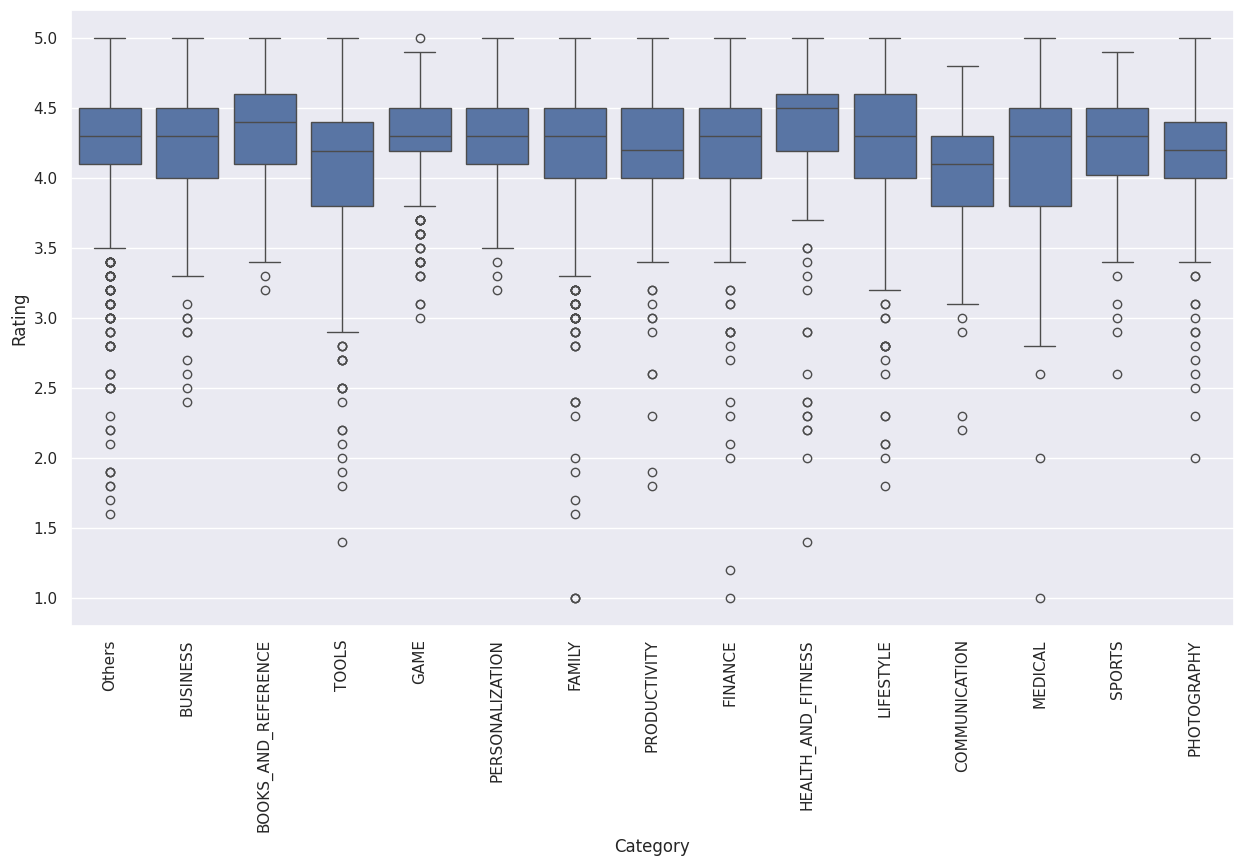

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='Category', y='Rating')
plt.xticks(rotation=90);

- *As it can be observed that median ratings of all categories are above 4 with some outliers at the bottom, which means 50% of the apps in Play Store have been rated more than 4*


Let's check mean of each category


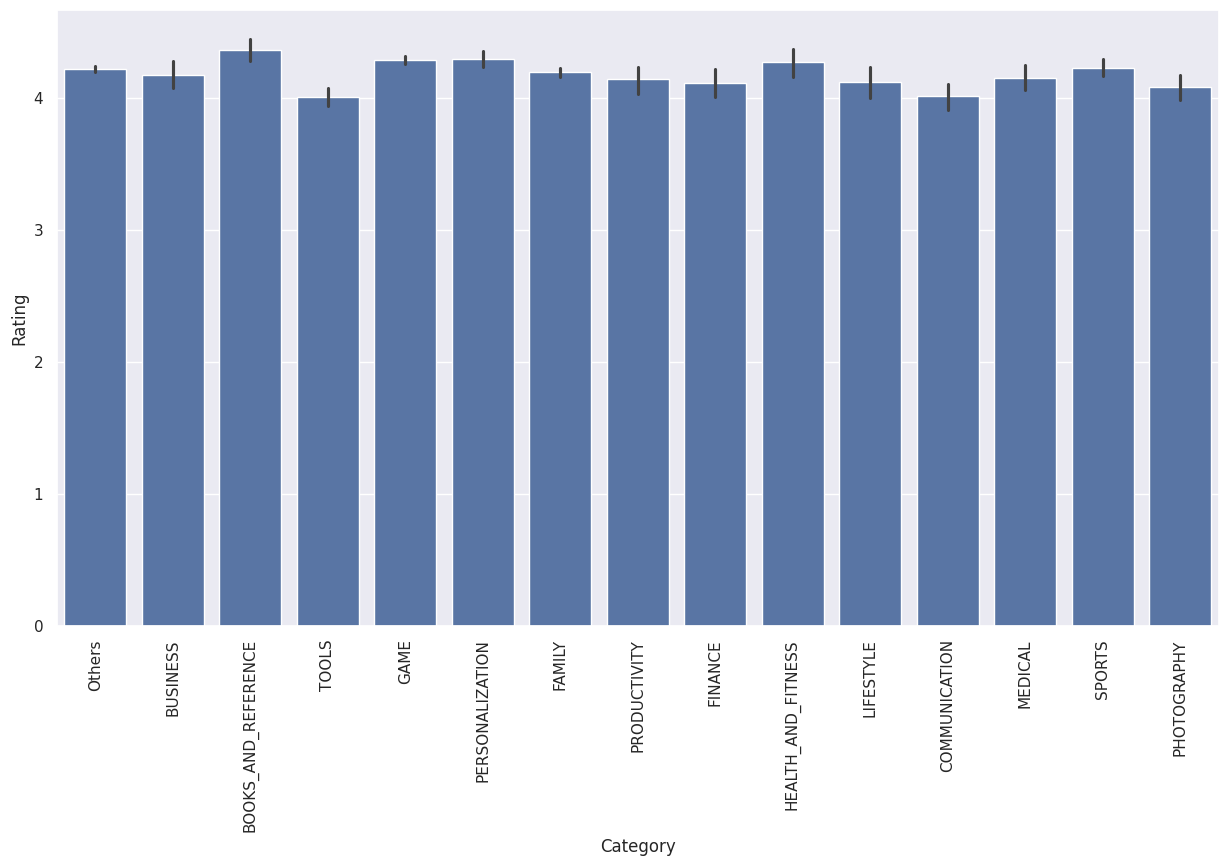

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='Category', y='Rating')
plt.xticks(rotation=90);

- *We can see that "Books and Reference" has higher average ratings then other app categories.*


Let's verify this.


In [ ]:
# Group by category, calculate the average rating, sort in descending order
average_ratings = df.groupby('Category')['Rating'].mean().reset_index().sort_values(by='Rating', ascending=False)
average_ratings


,Category,Rating
0,BOOKS_AND_REFERENCE,4.359505
10,PERSONALIZATION,4.294602
5,GAME,4.284958
6,HEALTH_AND_FITNESS,4.268838
13,SPORTS,4.228381
9,Others,4.214315
3,FAMILY,4.194421
1,BUSINESS,4.173910
8,MEDICAL,4.151622
12,PRODUCTIVITY,4.138241


- *Our observation was indeed correct.*

**Note**: As the number of ratings for each app is unavailable, we are taking the average of the average ratings here.

Let's take a deep dive here with a statistical analysis.

#### **Statistical Significance of the high rating of "Books and References" apps**

We can apply a t-test to see if the average rating of apps in the "Books and References" category significantly exceed 4.5 (the average rating of Play Store apps), indicating high user satisfaction.

**Null and Alternate Hypotheses**

Let $\mu$ be the mean rating of the apps in the "Books and References" category.

The null hypothesis can be written as

>$H_0: \mu \leq 4.5$

against the alternate hypothesis

>$H_a: \mu > 4.5$

**Significance Level**

Here, we consider the significance level $\alpha = 0.05$.

**Compute the Test Statistic and p-value**

In [ ]:
import scipy.stats as stats
from scipy.stats import ttest_1samp

In [ ]:
# Filter the data for the "BOOKS_AND_REFERENCE" category
books_and_reference = df[df['Category'] == 'BOOKS_AND_REFERENCE']

In [ ]:
# Perform a one-sample t-test and calculating test statistics and p-value
t_statistic, p_value_ttest = stats.ttest_1samp(books_and_reference['Rating'], popmean=4.5, alternative="greater")
print('One-sample t-test\n t-statistic: {0}\n p-value: {1}'.format(t_statistic, p_value_ttest))

One-sample t-test
 t-statistic: -3.37431832114308
 p-value: 0.9994391267441305


- *As the p-value (~0.999) is greater than the level of significance (0.05), we fail to reject the null hypothesis*

**We do not have enough statistical evidence to say that the average ratings of apps in the "Books and Reference" category is greater than 4.5.**

####**Category vs Installs**

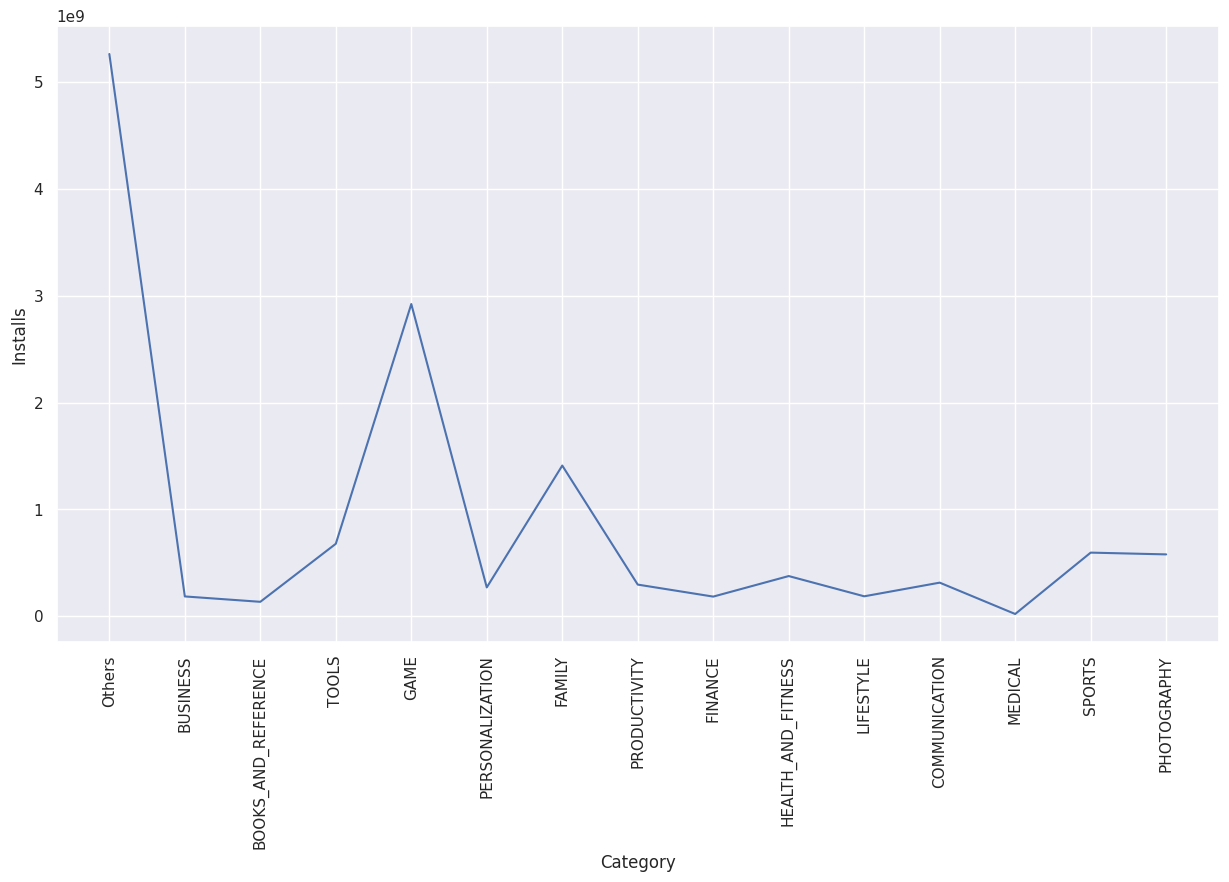

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df, x='Category', y='Installs', errorbar=None, estimator='sum')
plt.xticks(rotation=90);


- *Apps present in category Game has been installed more number of times than any other Category except those apps which are under Others Category*
- *Apps in Medical Category are installed least followed by Finance, Business, and Books and References*

#### **Paid/Free vs Ad Supported**

As the revenue for the apps which are free to use comes mostly from Advertisements and In App Purchases, therefore more free apps are likely to have in-app purchases and advertisements.

Let's check if that's the case.

In [ ]:
# Group by 'Paid/Free' and 'Ad Supported' and calculate the size of each group
grouped_data = df.groupby(['Paid/Free', 'Ad Supported']).size().reset_index(name='Counts')

# Calculate the total counts for each category
grouped_data['Total'] = grouped_data.groupby('Paid/Free')['Counts'].transform('sum')

# Calculate the proportion of each category
grouped_data['Proportion'] = grouped_data['Counts'] / grouped_data['Total']
grouped_data

,Paid/Free,Ad Supported,Counts,Total,Proportion
0,Free,No,1661,3828,0.433908
1,Free,Yes,2167,3828,0.566092
2,Paid,No,284,325,0.873846
3,Paid,Yes,41,325,0.126154


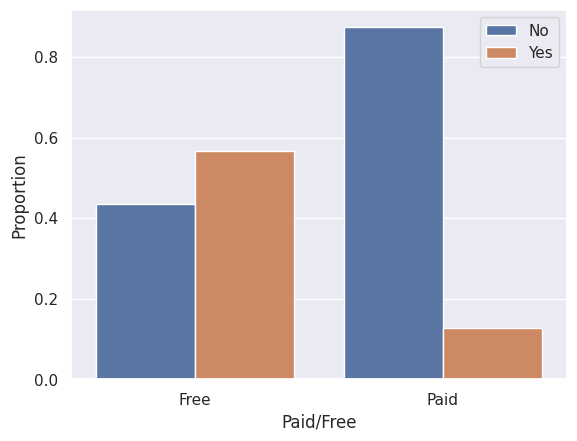

In [ ]:
sns.barplot(x="Paid/Free", y="Proportion", hue="Ad Supported", data=grouped_data)
plt.ylabel('Proportion')
plt.legend(bbox_to_anchor=(1,1));

- *We can see that the proportion of apps with advertisements is much higher for free apps than paid apps.*

#### **Paid/Free vs In App Purchases**

In [ ]:
# Group by 'Paid/Free' and 'In App Purchases' and calculate the size of each group
grouped_data = df.groupby(['Paid/Free', 'In App Purchases']).size().reset_index(name='Counts')

# Calculate the total counts for each category
grouped_data['Total'] = grouped_data.groupby('Paid/Free')['Counts'].transform('sum')

# Calculate the proportion of each category
grouped_data['Proportion'] = grouped_data['Counts'] / grouped_data['Total']
grouped_data

,Paid/Free,In App Purchases,Counts,Total,Proportion
0,Free,No,2323,3828,0.606844
1,Free,Yes,1505,3828,0.393156
2,Paid,No,263,325,0.809231
3,Paid,Yes,62,325,0.190769


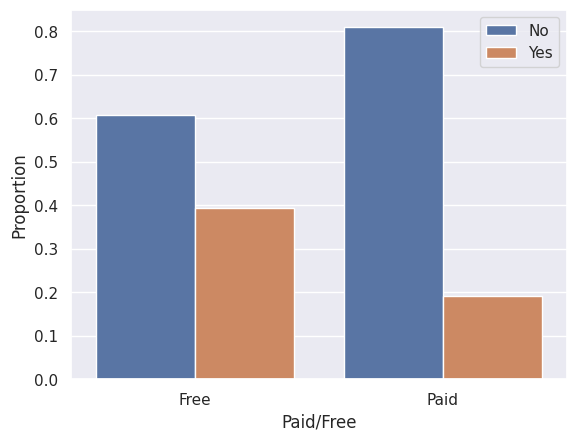

In [ ]:
sns.barplot(x="Paid/Free", y="Proportion", hue="In App Purchases", data=grouped_data)
plt.ylabel('Proportion')
plt.legend(bbox_to_anchor=(1,1));

- *We can see that the proportion of apps with in-app purchases is higher for free apps than paid apps.*

#### **Correlation Check**

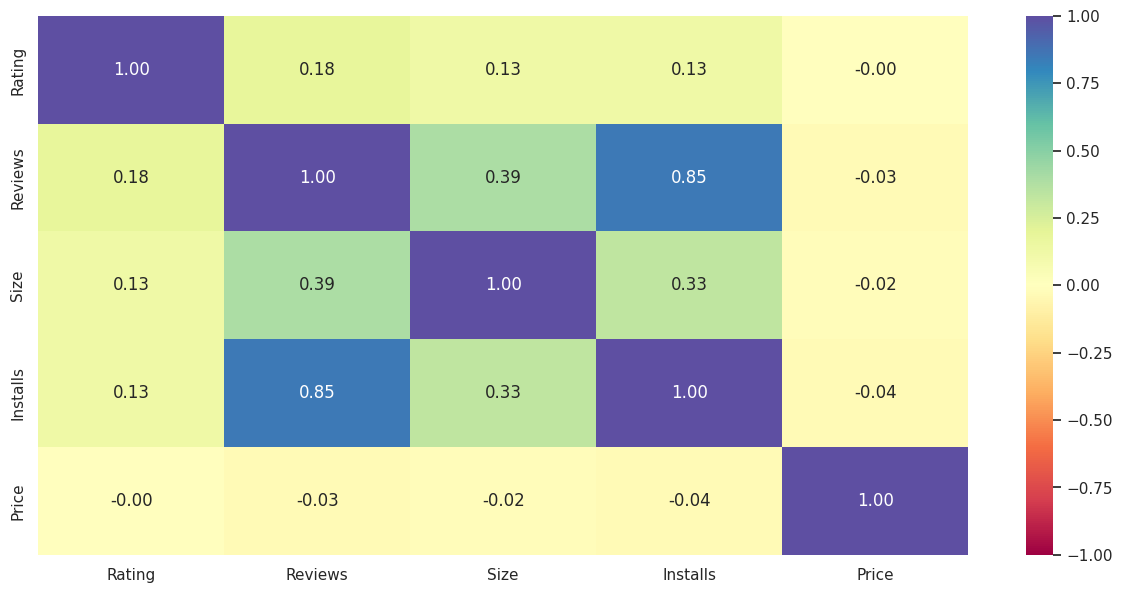

In [ ]:
corr = df.corr(numeric_only = True)

# plot the heatmap

plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- *As expected, Installs and Reviews have a strong correlation with each other*
- *There is no such relationship between any of the other variables*

## **Outlier Detection**

Let's visualize all the outliers present in the numerical variables of the data together.

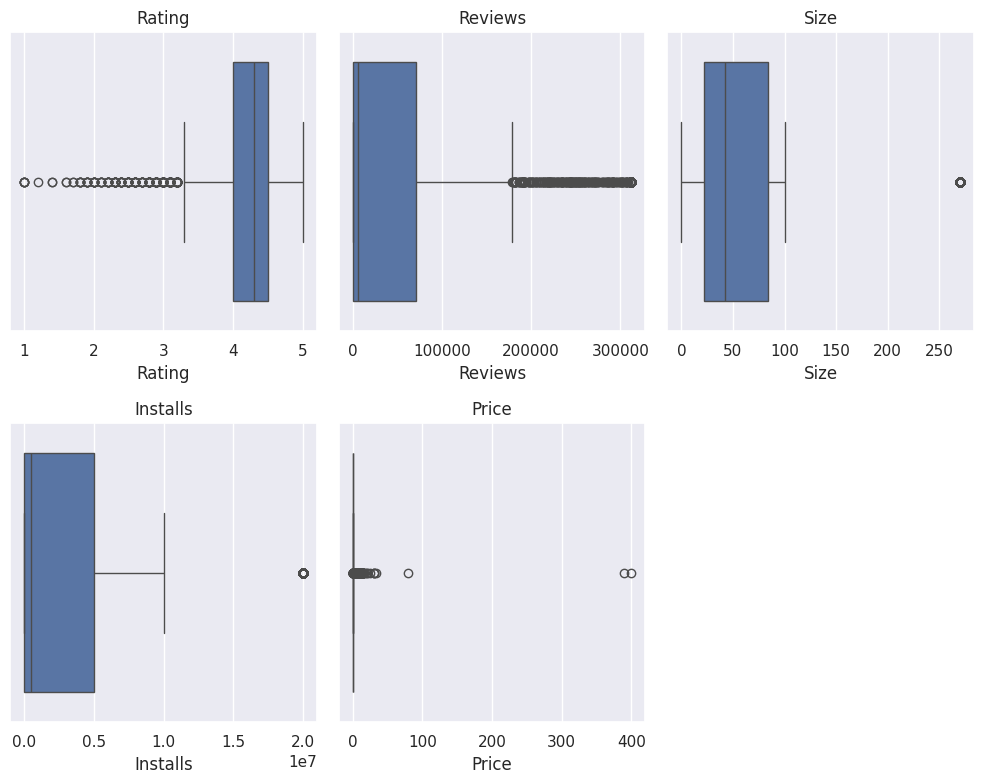

In [ ]:
# outlier detection using boxplot
# selecting the numerical columns of data and adding their names in a list
numeric_columns = ['Rating', 'Reviews', 'Size', 'Installs','Price']

plt.figure(figsize=(10, 8))

for i, variable in enumerate(numeric_columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df, x=variable)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- *The `Reviews` column has a wide range of values with lots of outliers. However we are not going to treat this column since the reviews can have a varying range and we can miss out on some genuine values if we treat this column*
- *Almost all the columns have outliers present in it*

## **Conclusions and Recommendations**

### **Conclusions**

1. *There are a total of 16 categories, among which apps under the Others category are maximum. Since these apps are a mixture of different categories, it will be difficult to conclude which type of app is trending. However, we can look for the second-best category i.e. **Family** category which has the most number of apps.*

2. *It can be inferred that apps under category **Family** are trending along with some other categories like **Game**, **Tools** etc.*

3. *Apps that are free to use generally have more advertisements and more in-app purhcase options.*

4. *A significant number of paid apps are likely to receive high ratings (more than 4.5).*

5. *Higher the number of installations of apps, higher will be the number of reviews.*

### **Recommendations**

1. *The agency should focus on apps under **Family** category for Advertisement as they are significantly trending in the market. They can invest in other categories like **Game** and **Tools** as they also contain trending apps.*

2. *Since apps which support ads are mostly free to use, the agency should look forward to invest in free apps rather than paid apps.*

3. *As there is a high correlation between reviews and installations, the agency should check for those apps which have high number of reviews as those apps are more likely to get installed.*

4. *Since a large number of paid apps are receiving high ratings, the marketing team can leverage this information to promote these apps more effectively. Highlighting the high user ratings in marketing campaigns can attract more users and potentially increase conversion rates.*

5. *Since "Books and Reference" apps do not significantly outperform others in terms of ratings, the agency should diversify its portfolio by also exploring other app categories (e.g., Games, Family, Tools) where ratings are high too.*

<font size=6 color='blue'>Power Ahead</font>
___